In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from heatmap import heatmap
from maps import case_maps
from phe import *
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
35,638 cases (7 day average) as of Fri 26 Nov, +66.0 since Thu 25 Nov
652 hospitalised (7 day average) as of Mon 29 Nov, +9.6 since Sun 28 Nov
92 died (7 day average) as of Fri 26 Nov, -0.6 since Thu 25 Nov


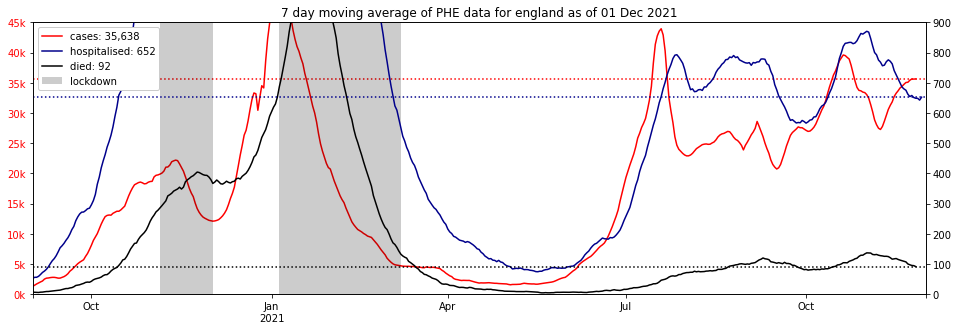

In [18]:
plot_summary(earliest_date='2020-09-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=45_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=900)

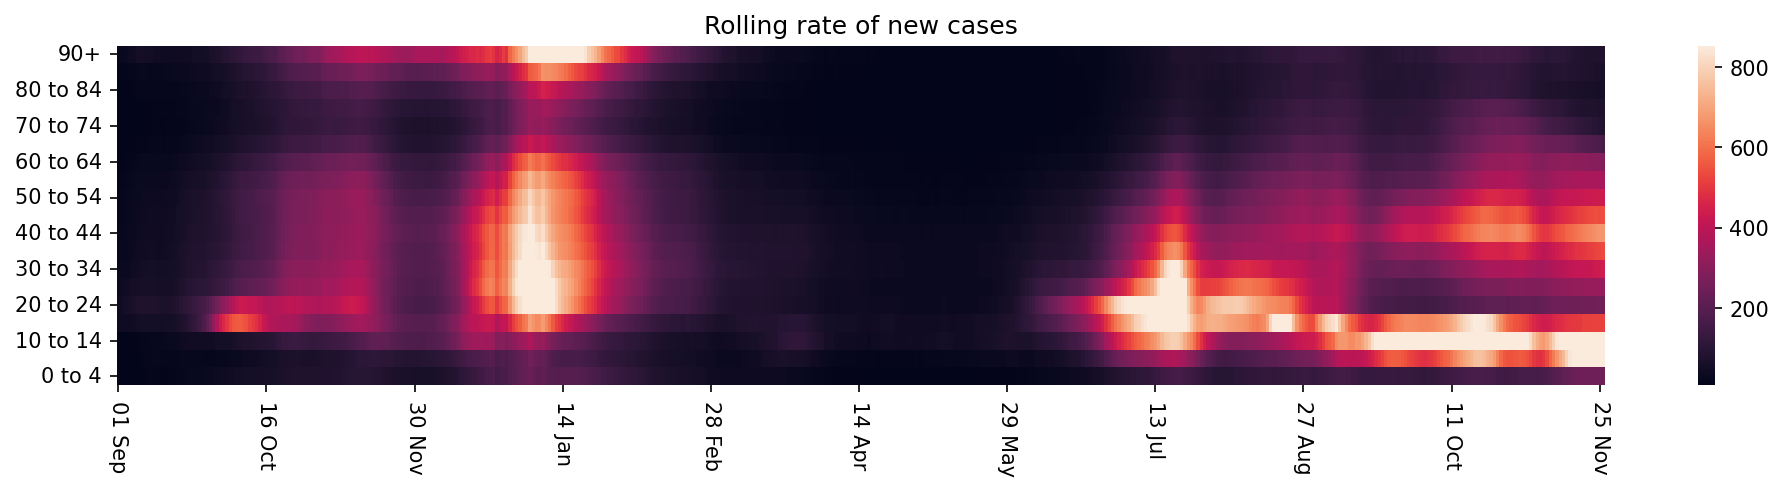

In [4]:
data = load_demographic_data('case_demographics_nation', 'England', 'rollingRate', start='2020-09')[0]
heatmap(data, title='Rolling rate of new cases', figsize=(16, 3))

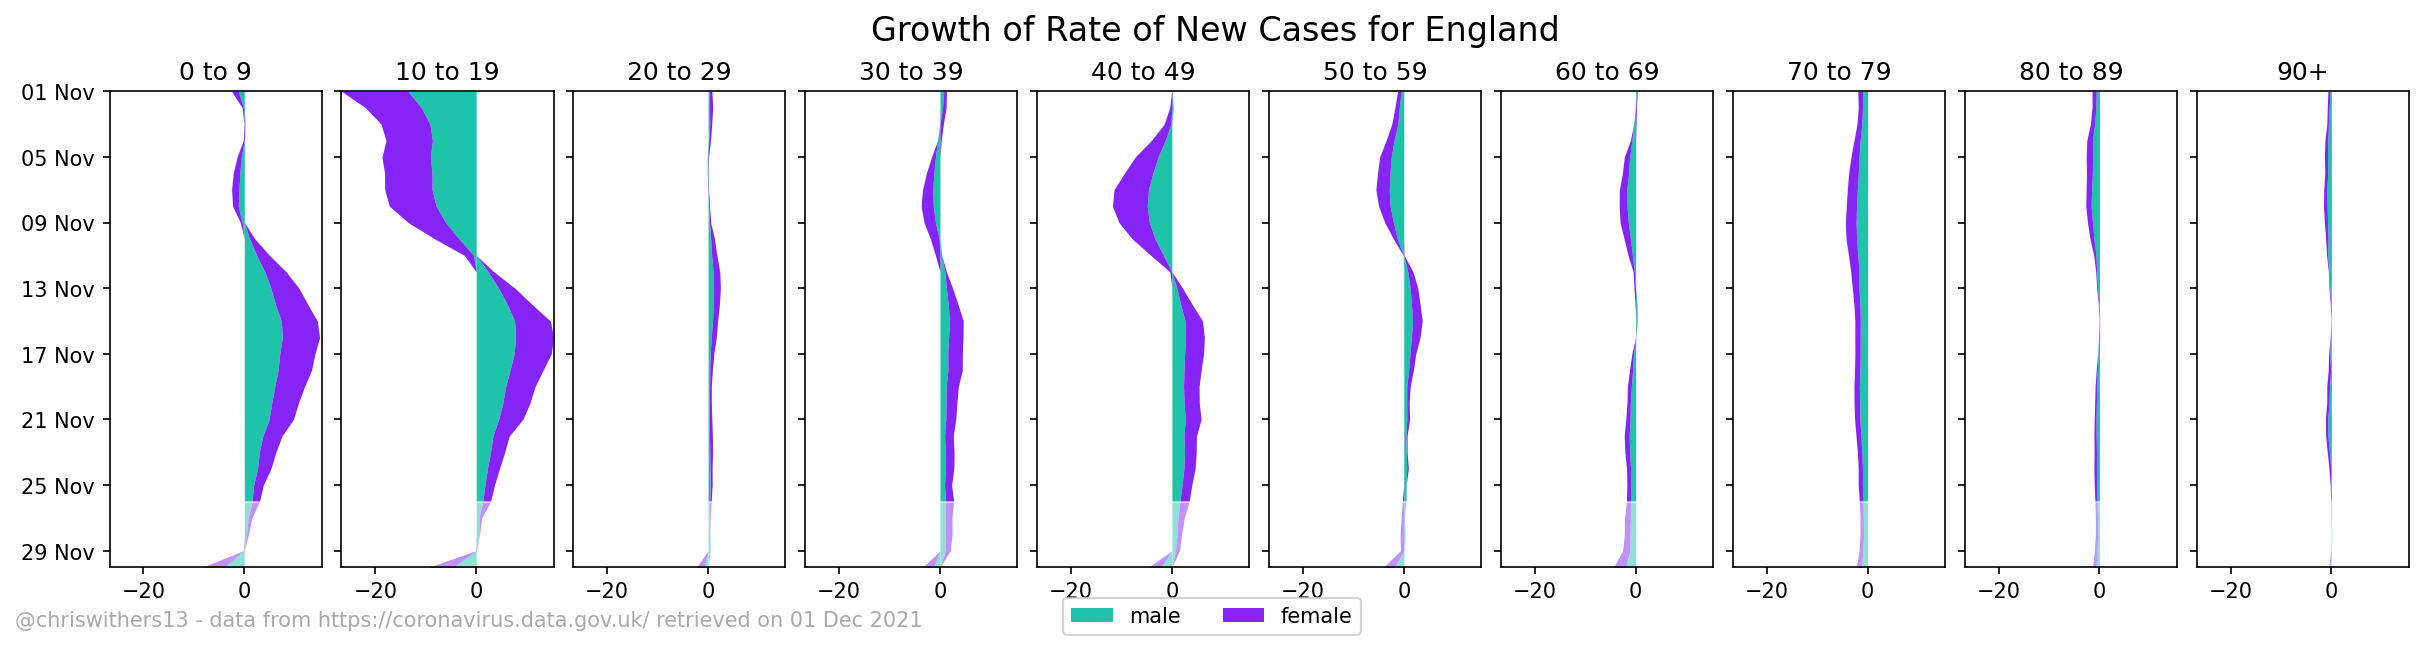

In [5]:
demographic_stream_plot('Growth of Rate of New Cases', order=2, figsize=(16, 4))

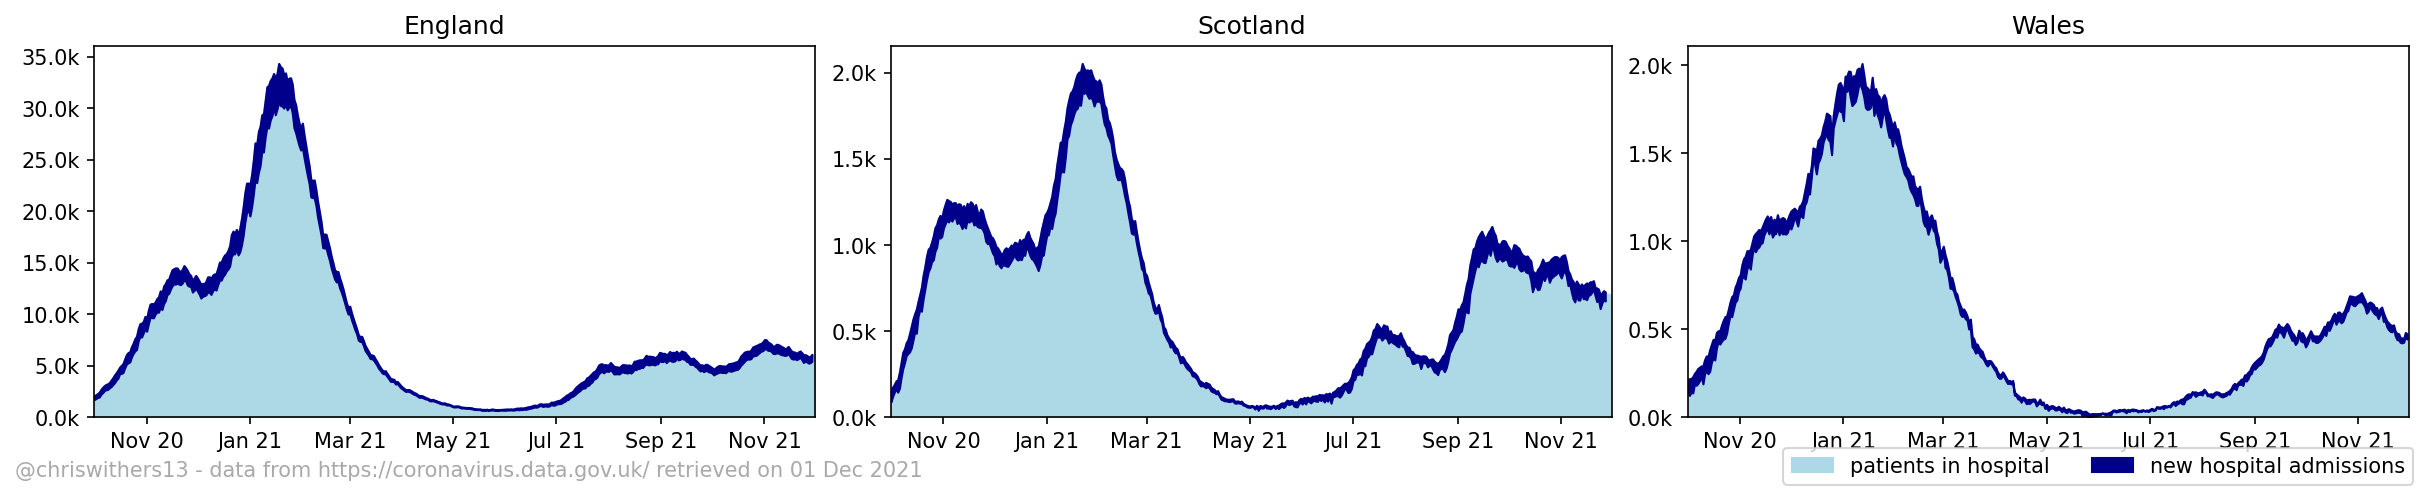

In [6]:
hospital_plot(start='2020-10', figsize=(16,3), figs=(1, 3))

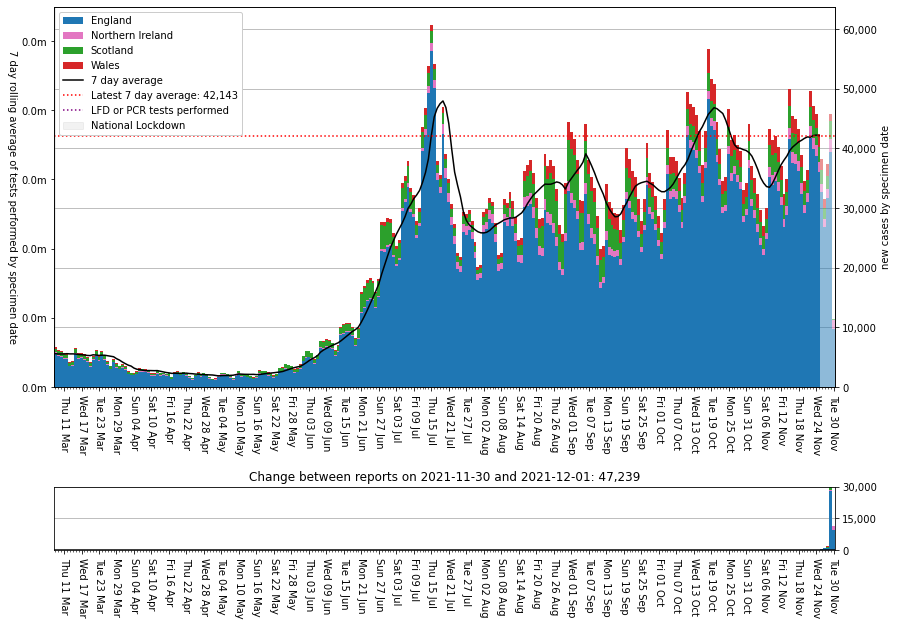

In [7]:
plot_areas(for_date, 'cases_nations', date_format='%a %d %b')

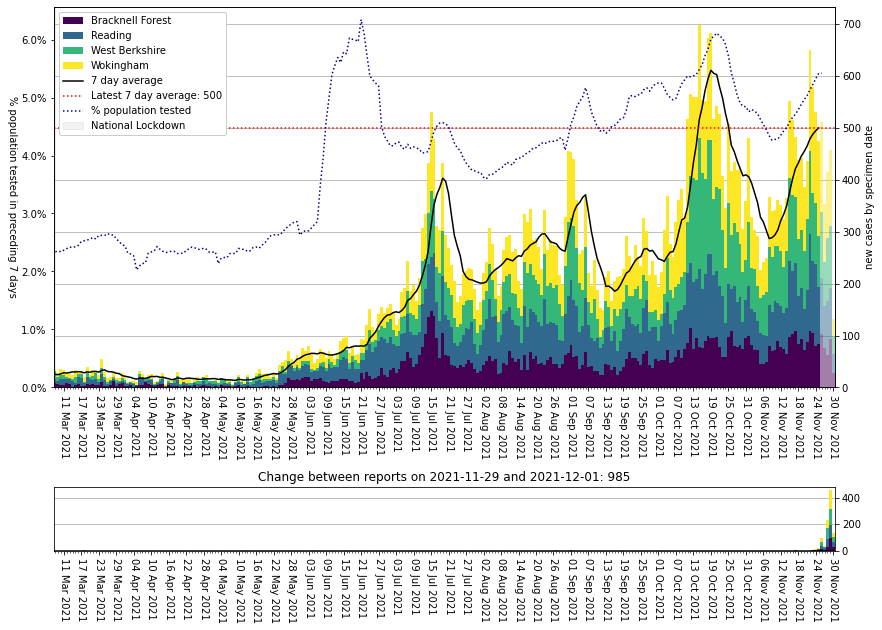

In [8]:
plot_areas(for_date, areas=my_areas, lines=unique_people_tested)

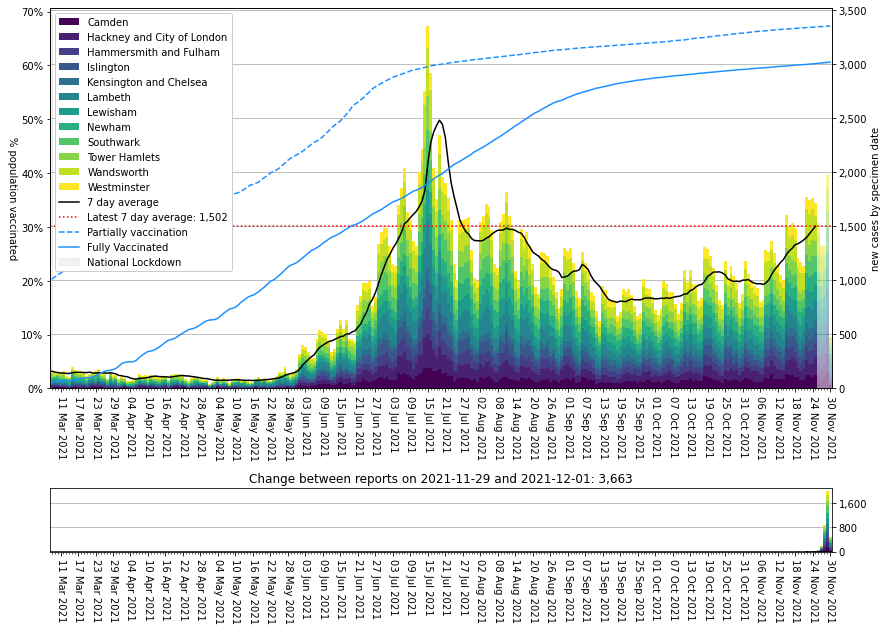

In [9]:
plot_areas(for_date, areas=london_areas, lines=population_vaccinated)

In [10]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [11]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                 
E07000046                 Torridge          912.593200   
E07000043              North Devon          749.395234   
N09000010   Newry, Mourne and Down          711.261082   
E07000228               Mid Sussex          699.235873   
N09000001  Antrim and Newtownabbey          698.935221   
E07000216                 Waverley          695.807739   
E07000086                Eastleigh          678.224937   
E07000063                    Lewes          674.942867   
E07000042                Mid Devon          663.337828   
E07000207                Elmbridge          663.035930   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E07000046                   623.0    2021-11-30  
E07000043                   728.0    2021-11-30  
N09000010                  1290.0    2021-11-30  
E07000228                  1056.0    2021-11-30  
N09000001                  1003.0    2021-11-30  
E07000216                   879.0    2021-11-30  
E07000086                   906.0    2021-11-30  
E07000063                   697.0    2021-11-30  
E07000042                   546.0    2021-11-30  
E07000207                   907.0    2021-11-30

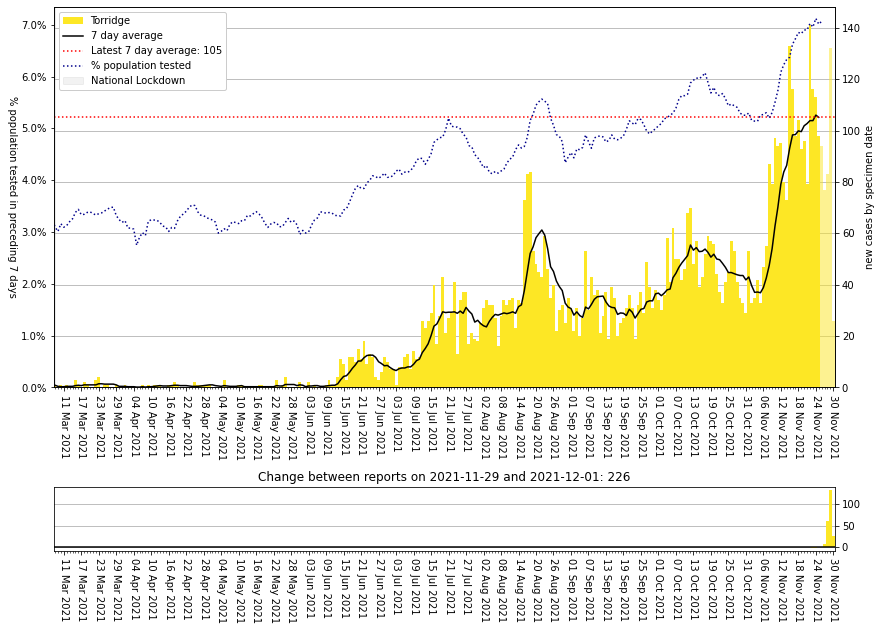

In [12]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [13]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

areaName  per 100,000 people  \
areaCode                                                             
E08000025                           Birmingham          255.207494   
E06000052         Cornwall and Isles of Scilly          494.227023   
E06000058  Bournemouth, Christchurch and Poole          550.424834   
E06000054                            Wiltshire          435.179111   
E08000035                                Leeds          261.618707   
N09000003                              Belfast          560.630141   
E06000047                        County Durham          341.260229   
E06000059                               Dorset          477.136547   
E06000026                             Plymouth          614.650897   
E06000023                     Bristol, City of          328.674060   

           newCasesBySpecimenDate Specimen date  
areaCode                                         
E08000025                  2914.0    2021-11-30  
E06000052                  2826.0    2021-11-30  
E06000058                  2176.0    2021-11-30  
E06000054                  2176.0    2021-11-30  
E08000035                  2075.0    2021-11-30  
N09000003                  1926.0    2021-11-30  
E06000047                  1809.0    2021-11-30  
E06000059                  1806.0    2021-11-30  
E06000026                  1611.0    2021-11-30  
E06000023                  1523.0    2021-11-30

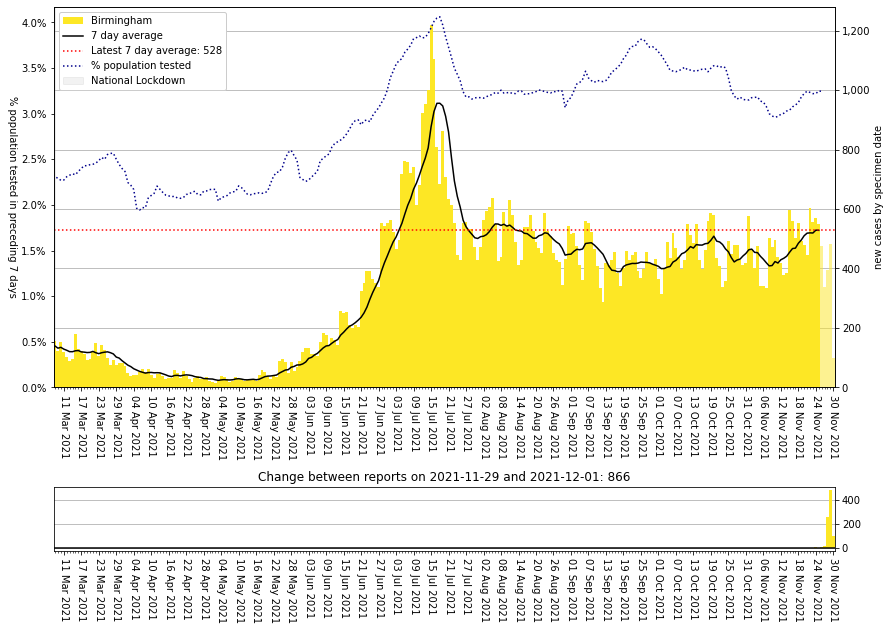

In [14]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

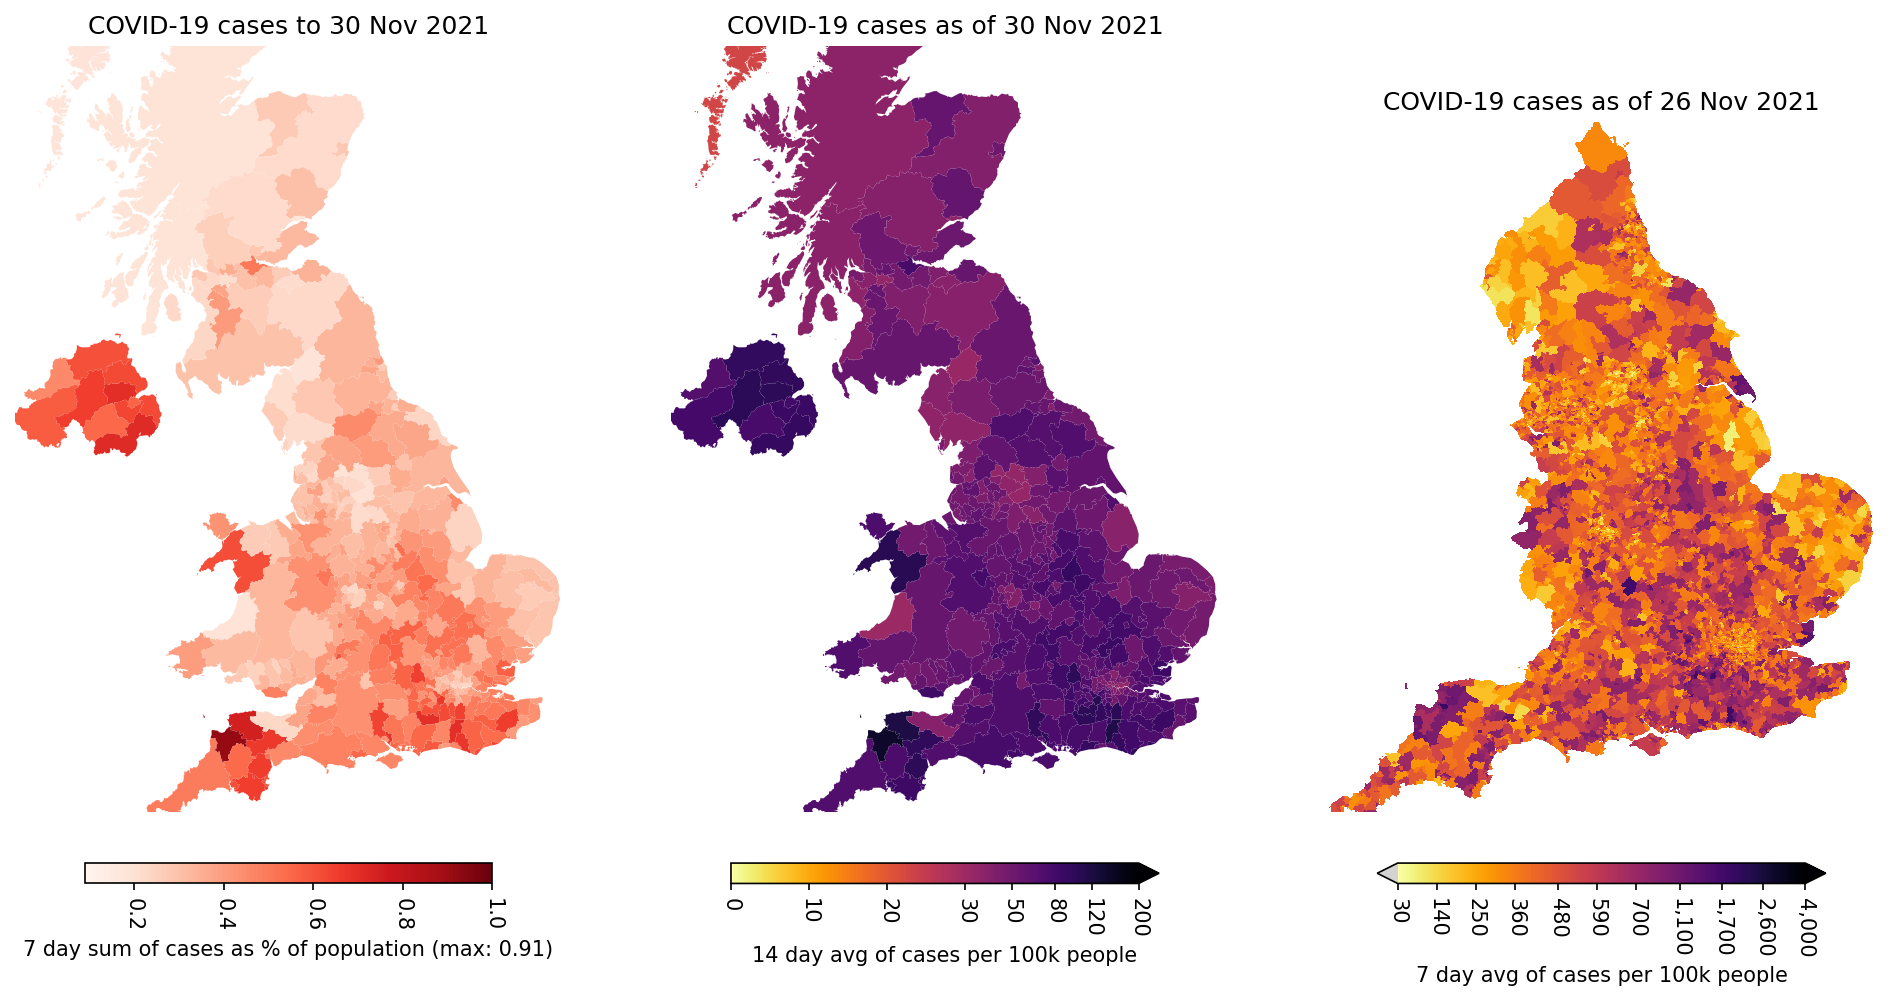

Loading BokehJS ...

In [15]:
case_maps(for_date, sum_vmax=1)

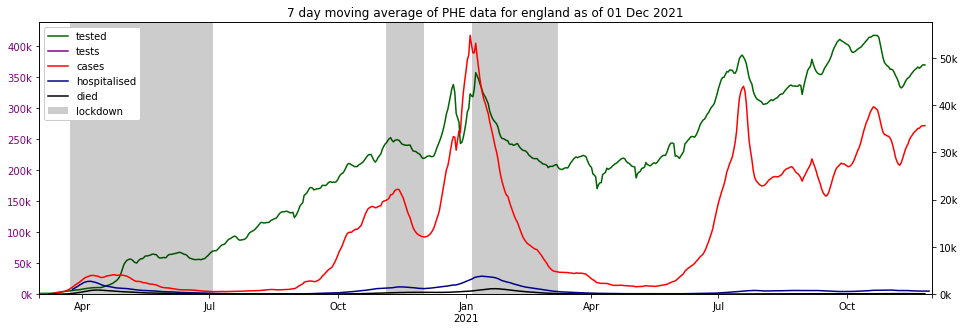

In [16]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

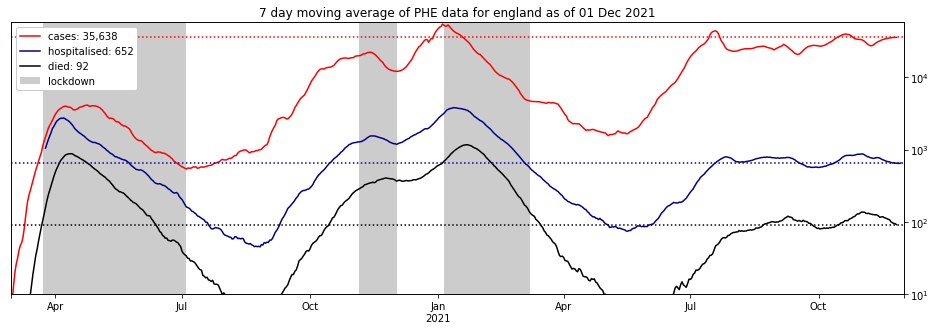

In [17]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))